# Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Importing Data and basic EDA

In [2]:
def parser(x):
    return pd.datetime.strptime('200'+x,'%Y-%m')

In [3]:
shampoo=pd.read_csv("C:/Users/Hassan Ahmed/Desktop/Data Science Cohort-1 FTI/shampoo-sales.csv",index_col=0,parse_dates=True,
                   date_parser=parser)
print(shampoo.shape)
shampoo.columns

(36, 1)


Index(['Sales'], dtype='object')

In [4]:
shampoo.head()

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


# Data Visualization

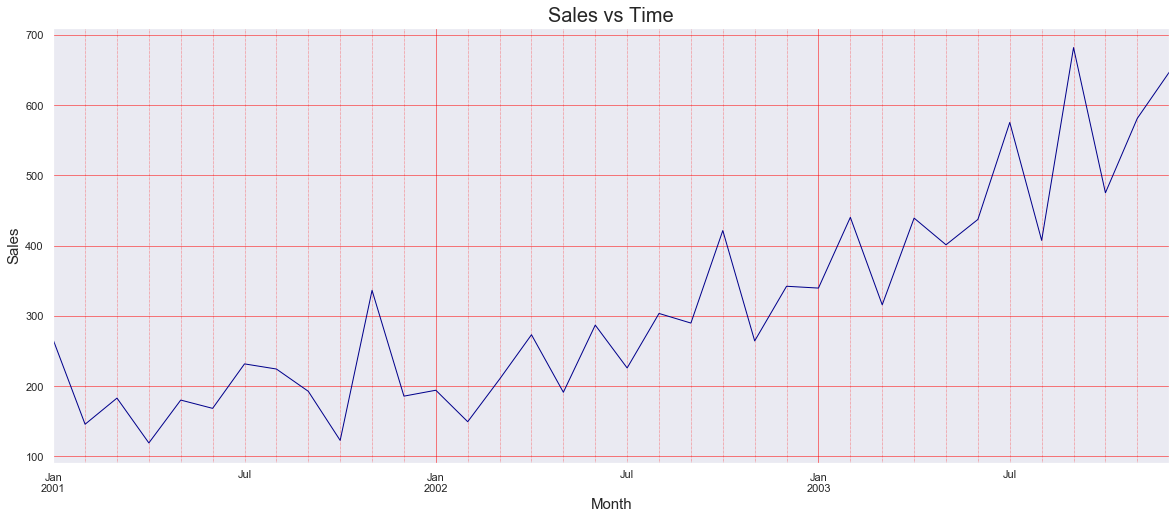

In [23]:
# Sales vs Time
sns.set(rc={"figure.figsize":(20,8)})
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.grid()
plt.title("Sales vs Time",fontsize=20)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Sales",fontsize=15)
shampoo["Sales"].plot(linewidth=1,color="darkblue",markersize=12)

# Feature Engineering

In [24]:
# Date Time Features
shampoo["Year"]=shampoo.index.year
shampoo["Month"]=shampoo.index.month
shampoo["Week_Day"]=shampoo.index.weekday_name
shampoo["Hour"]=shampoo.index.hour
shampoo.head(10)

,Sales,Year,Month,Week_Day,Hour
Month,,,,,
2001-01-01,266.0,2001,1,Monday,0
2001-02-01,145.9,2001,2,Thursday,0
2001-03-01,183.1,2001,3,Thursday,0
2001-04-01,119.3,2001,4,Sunday,0
2001-05-01,180.3,2001,5,Tuesday,0
2001-06-01,168.5,2001,6,Friday,0
2001-07-01,231.8,2001,7,Sunday,0
2001-08-01,224.5,2001,8,Wednesday,0
2001-09-01,192.8,2001,9,Saturday,0


# Sliding Window (Lag Features)

In [25]:
temps=pd.DataFrame(shampoo["Sales"])

In [27]:
df=pd.concat([temps.shift(3),temps.shift(2),temps.shift(1),temps],axis=1)
df.columns=["t-2","t-1","t","t+1(Sales)"]
df.head(10)

,t-2,t-1,t,t+1(Sales)
Month,,,,
2001-01-01,NaN,NaN,NaN,266.0
2001-02-01,NaN,NaN,266.0,145.9
2001-03-01,NaN,266.0,145.9,183.1
2001-04-01,266.0,145.9,183.1,119.3
2001-05-01,145.9,183.1,119.3,180.3
2001-06-01,183.1,119.3,180.3,168.5
2001-07-01,119.3,180.3,168.5,231.8
2001-08-01,180.3,168.5,231.8,224.5
2001-09-01,168.5,231.8,224.5,192.8


# Rolling Window & Statistics

In [29]:
temps=pd.DataFrame(shampoo["Sales"].values)
shifted=temps.shift(1)
shifted.head()

,0
0,NaN
1,266.0
2,145.9
3,183.1
4,119.3


In [37]:
window=shifted.rolling(window=2)
means=window.mean()
df0=pd.concat([means,temps],axis=1)
df0.columns=["Mean(t-1,t)","t+1(Sales)"]
df0.head(10)

,"Mean(t-1,t)",t+1(Sales)
0,NaN,266.0
1,NaN,145.9
2,205.95,183.1
3,164.50,119.3
4,151.20,180.3
5,149.80,168.5
6,174.40,231.8
7,200.15,224.5
8,228.15,192.8
9,208.65,122.9


In [38]:
# Rolling Statistics
window=shifted.rolling(window=3)
df1=pd.concat([window.min(),window.max(),window.mean(),temps],axis=1)
df1.columns=["Min","Max","Mean(t-2,t-1,t)","t+1(Sales)"]
df1.head(10)

,Min,Max,"Mean(t-2,t-1,t)",t+1(Sales)
0,NaN,NaN,NaN,266.0
1,NaN,NaN,NaN,145.9
2,NaN,NaN,NaN,183.1
3,145.9,266.0,198.333333,119.3
4,119.3,183.1,149.433333,180.3
5,119.3,183.1,160.900000,168.5
6,119.3,180.3,156.033333,231.8
7,168.5,231.8,193.533333,224.5
8,168.5,231.8,208.266667,192.8
9,192.8,231.8,216.366667,122.9


# Expanding Window & Statistics

In [65]:
window=temps.expanding()
df2=pd.concat([window.min(),window.max(),window.mean().round(2),temps.shift(-1)],axis=1)
df2.columns=["Min","Max","Mean(t-2,t-1,t)","t+1(Sales)"]
df2.head(25)

,Min,Max,"Mean(t-2,t-1,t)",t+1(Sales)
0,266.0,266.0,266.00,145.9
1,145.9,266.0,205.95,183.1
2,145.9,266.0,198.33,119.3
3,119.3,266.0,178.58,180.3
4,119.3,266.0,178.92,168.5
5,119.3,266.0,177.18,231.8
6,119.3,266.0,184.99,224.5
7,119.3,266.0,189.92,192.8
8,119.3,266.0,190.24,122.9
9,119.3,266.0,183.51,336.5


# EDA on new Dataset

In [66]:
df2.isnull().sum()

Min                0
Max                0
Mean(t-2,t-1,t)    0
t+1(Sales)         1
dtype: int64

In [67]:
df2.dropna(inplace=True)

In [68]:
y=df2["t+1(Sales)"].copy()
del df2["t+1(Sales)"]
x=df2.copy()

In [69]:
x=x.values
y=y.values

# Train-Test Split

In [79]:
import sklearn.preprocessing as skp
import sklearn.model_selection as skm
#create train-test split parts for manual split
X_train, X_test, y_train, y_test= skm.train_test_split(x, y, test_size=0.30, random_state=42)
print("\n Shape of train split: ")
print(X_train.shape, y_train.shape)
print("\n Shape of test split: ")
print(X_test.shape, y_test.shape)


 Shape of train split: 
(24, 3) (24,)

 Shape of test split: 
(11, 3) (11,)


# Linear Regression Model

In [80]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred=regressor.predict(X_test)
print("R squared Value: ",regressor.score(X_train,y_train)) # R^2 Value
print("Test Score Value: ",regressor.score(X_test,y_test)) # Test Score
print("Coefficient Values: ",regressor.coef_)
print("Intercept Values: ",regressor.intercept_)

R squared Value:  0.8516860356718248
Test Score Value:  0.6944572248675653
Coefficient Values:  [-2.80975062 -0.23286256  4.22954094]
Intercept Values:  -186.33702305664968


# Actual vs Predicted

In [81]:
dfcomp=pd.DataFrame({"Actual":y_test.flatten(),"Predicted":y_pred.flatten()})
dfcomp

,Actual,Predicted
0,439.3,410.875724
1,210.1,216.191401
2,440.4,370.124339
3,264.5,323.134139
4,191.4,241.949305
5,575.5,487.557302
6,289.9,286.782439
7,149.5,230.318067
8,122.9,221.146155
9,287.0,240.046012


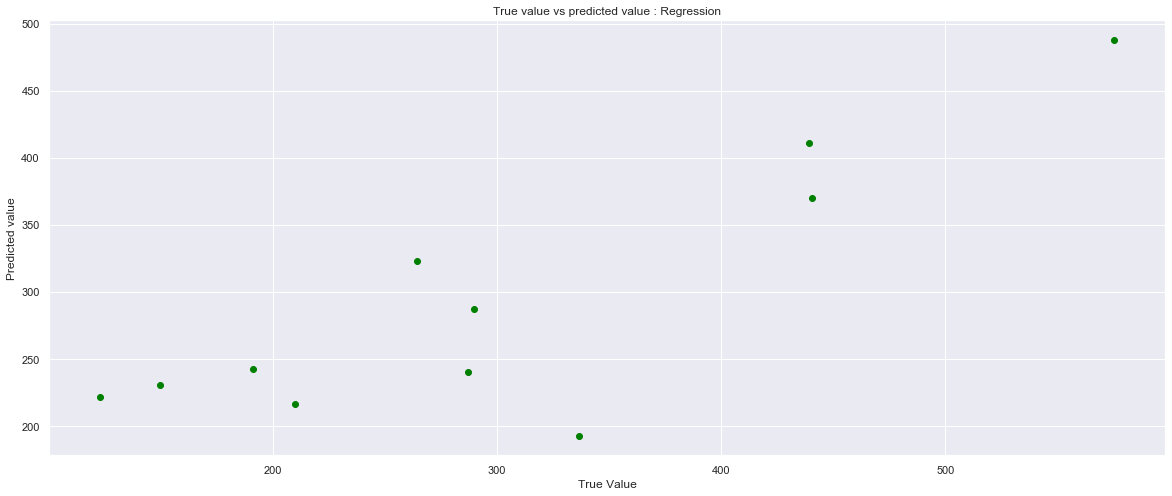

In [82]:
plt.scatter(y_test, y_pred, c = 'green') 
plt.xlabel("True Value") 
plt.ylabel("Predicted value") 
plt.title("True value vs predicted value : Regression") 
plt.show() 

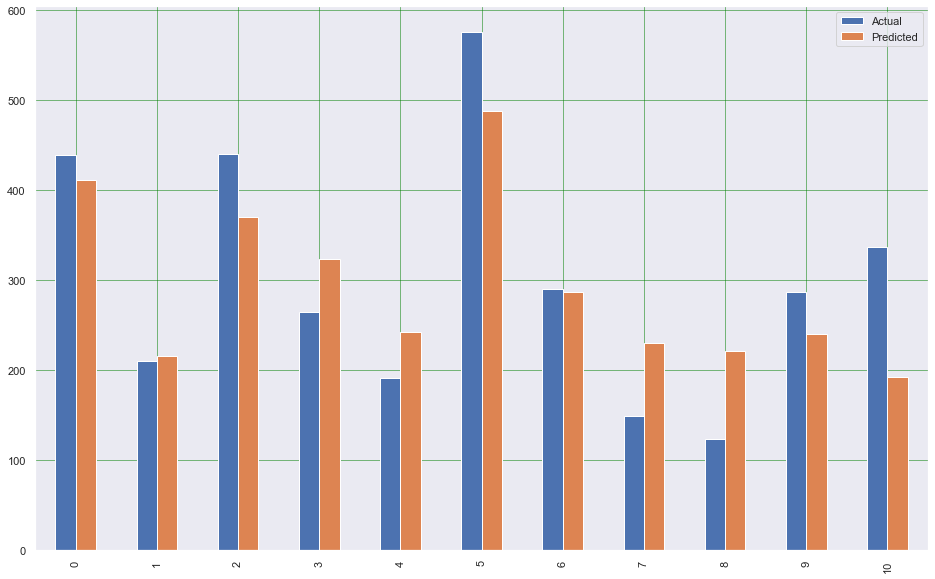

In [83]:
df = dfcomp.head(15)
df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Thank You